In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/my_drive')

Drive already mounted at /content/my_drive; to attempt to forcibly remount, call drive.mount("/content/my_drive", force_remount=True).


In [3]:
# useful lib
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import metrics
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
# Read the csv file
df= pd.read_csv("/content/my_drive/MyDrive/ColabNotebooks/DeepL/titanic.csv")
df

,Sex,Age,Relatives,Fare,SibSp,Parch,Title,Embarked,Pclass,Survived
0,1,28.000000,0,13.0000,0,0,Mrs,2,2,0
1,1,25.000000,0,7.6500,0,0,Mrs,2,3,0
2,1,20.000000,0,7.8542,0,0,Mrs,2,3,0
3,0,29.000000,4,21.0750,0,4,Mrs,2,3,0
4,1,31.000000,1,52.0000,1,0,Mrs,2,1,0
...,...,...,...,...,...,...,...,...,...,...
886,0,14.000000,1,30.0708,1,0,Mrs,0,2,1
887,1,22.000000,0,7.2292,0,0,Mrs,0,3,0
888,0,30.000000,0,8.6625,0,0,Miss,2,3,0
889,1,29.699118,0,7.8958,0,0,Mrs,2,3,0


In [5]:
print(df.columns)
print(df.index)

Index(['Sex', 'Age', 'Relatives', 'Fare', 'SibSp', 'Parch', 'Title',
       'Embarked', 'Pclass', 'Survived'],
      dtype='object')
RangeIndex(start=0, stop=891, step=1)


In [6]:
X=df[['Sex','Age','Relatives','Fare','Parch','Title','SibSp','Embarked','Pclass']] # selected features 
Y= df['Survived']# select the target survived
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=12)

In [7]:
def normalize (df):
    features= df.columns
    for column in features:
        mu = df[column].mean()
        sigma = df[column].std()
        df[column] = (df[column] - mu)/sigma

In [8]:
encoder= LabelEncoder()
X_train['Title']= encoder.fit_transform(X_train['Title'])
X_test['Title']= encoder.transform(X_test['Title'])
normalize(X_train)
normalize(X_test)

In [9]:
clf = tree.DecisionTreeClassifier()  
clf.fit(X_train, Y_train)   #fitting our model
Y_pred=clf.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(Y_test, Y_pred)))

score:0.7724358974358975


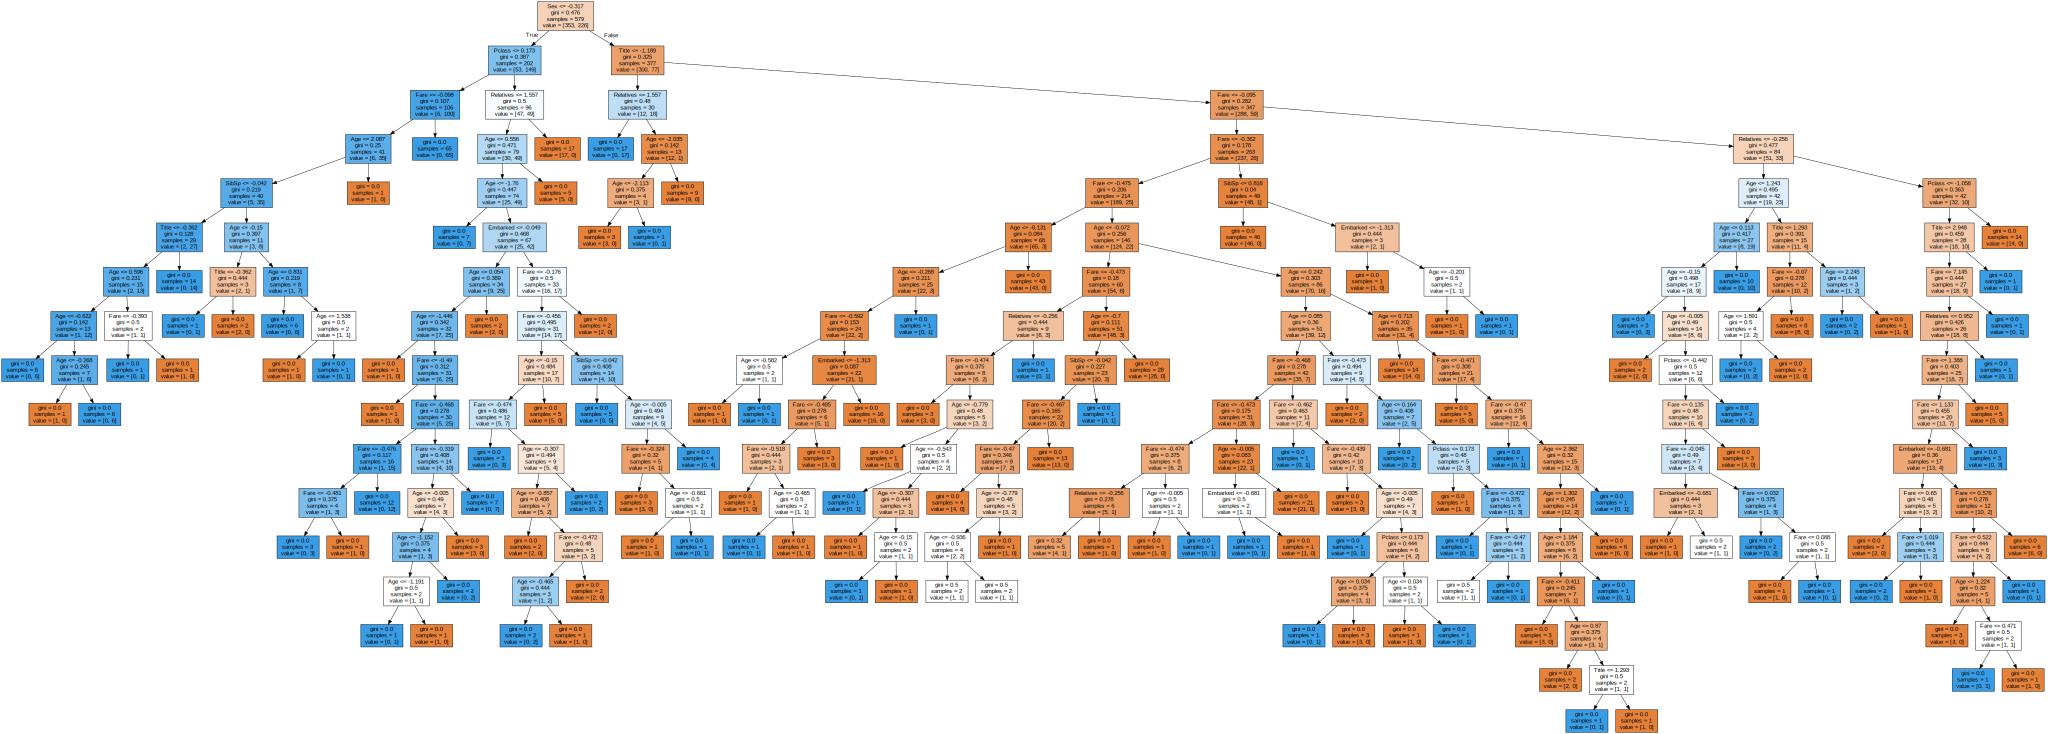

In [10]:
dot_data = tree.export_graphviz(clf, out_file=None,  feature_names=X_train.columns,  
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [11]:
print(clf.tree_.node_count) 
print (clf.tree_.max_depth)

259
16


The model is : 17 level tree with 269 node
# Manual prediction: 
- Predecting the first ondervation in the testset

In [12]:
X_train.head(1)

,Sex,Age,Relatives,Fare,Parch,Title,SibSp,Embarked,Pclass
316,0.731357,-0.425252,-0.558401,-0.479772,-0.481853,0.465818,-0.472379,0.582797,0.78893


- Sex > -0.367, Pclass >-1.005, title > -1.182, fare < 0.436, age <0.352 ... ect

# Change the decision tree parameters
- Changing criterrion (gini, entopy)
- Changing max_depth= (5 , 7)

Output when max_depth is : 5 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       196
           1       0.72      0.77      0.74       116

    accuracy                           0.80       312
   macro avg       0.79      0.79      0.79       312
weighted avg       0.80      0.80      0.80       312

Accuracy score on test:  0.801
Accuracy score on train:  0.865
log_loss :  6.863564494854227
AUC Score :  0.848


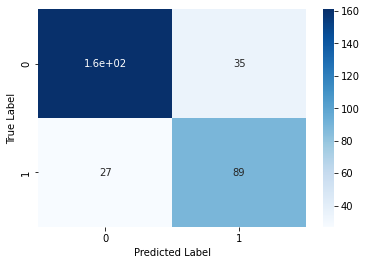



Output when max_depth is : 6 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       196
           1       0.69      0.72      0.70       116

    accuracy                           0.78       312
   macro avg       0.76      0.76      0.76       312
weighted avg       0.78      0.78      0.78       312

Accuracy score on test:  0.776
Accuracy score on train:  0.87
log_loss :  7.749179271630338
AUC Score :  0.843


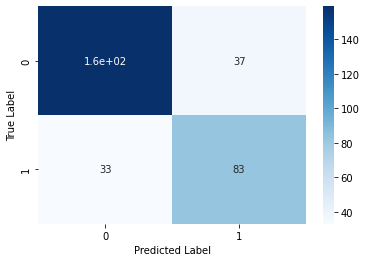



Output when max_depth is : 7 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       196
           1       0.74      0.71      0.72       116

    accuracy                           0.80       312
   macro avg       0.78      0.78      0.78       312
weighted avg       0.80      0.80      0.80       312

Accuracy score on test:  0.798
Accuracy score on train:  0.889
log_loss :  6.974250324374515
AUC Score :  0.824


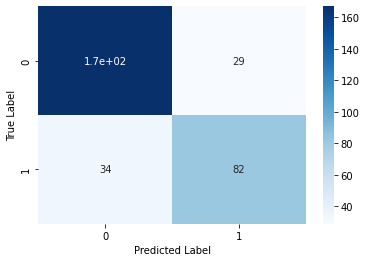



Output when max_depth is : 8 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       196
           1       0.71      0.69      0.70       116

    accuracy                           0.78       312
   macro avg       0.77      0.76      0.77       312
weighted avg       0.78      0.78      0.78       312

Accuracy score on test:  0.782
Accuracy score on train:  0.912
log_loss :  7.527764044781065
AUC Score :  0.798


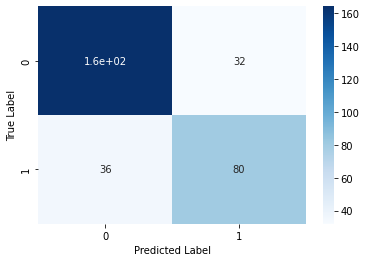



Output when max_depth is : 9 and criterion is:  gini
----------------------------------
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       196
           1       0.71      0.60      0.65       116

    accuracy                           0.76       312
   macro avg       0.75      0.73      0.73       312
weighted avg       0.76      0.76      0.76       312

Accuracy score on test:  0.76
Accuracy score on train:  0.933
log_loss :  8.30266480110185
AUC Score :  0.752


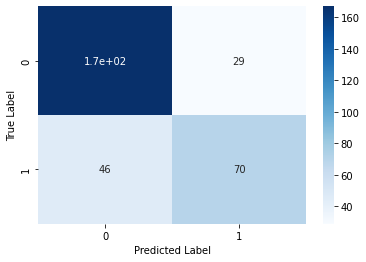

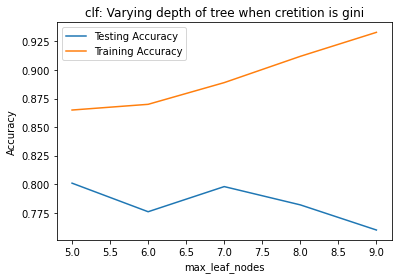

Output when max_depth is : 5 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       196
           1       0.69      0.78      0.73       116

    accuracy                           0.79       312
   macro avg       0.77      0.79      0.78       312
weighted avg       0.80      0.79      0.79       312

Accuracy score on test:  0.788
Accuracy score on train:  0.853
log_loss :  7.306382134491389
AUC Score :  0.852


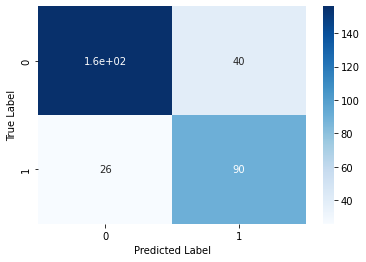



Output when max_depth is : 6 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       196
           1       0.70      0.72      0.71       116

    accuracy                           0.78       312
   macro avg       0.77      0.77      0.77       312
weighted avg       0.78      0.78      0.78       312

Accuracy score on test:  0.782
Accuracy score on train:  0.87
log_loss :  7.527771733217896
AUC Score :  0.847


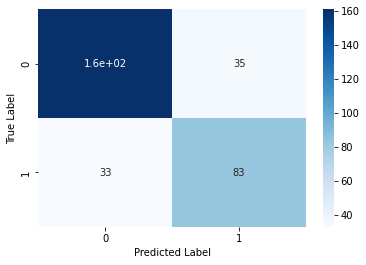



Output when max_depth is : 7 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       196
           1       0.69      0.72      0.71       116

    accuracy                           0.78       312
   macro avg       0.76      0.77      0.77       312
weighted avg       0.78      0.78      0.78       312

Accuracy score on test:  0.779
Accuracy score on train:  0.877
log_loss :  7.638478065236392
AUC Score :  0.833


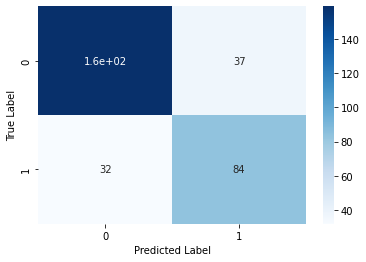



Output when max_depth is : 8 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       196
           1       0.77      0.66      0.71       116

    accuracy                           0.80       312
   macro avg       0.79      0.77      0.78       312
weighted avg       0.80      0.80      0.80       312

Accuracy score on test:  0.801
Accuracy score on train:  0.896
log_loss :  6.863533741106914
AUC Score :  0.807


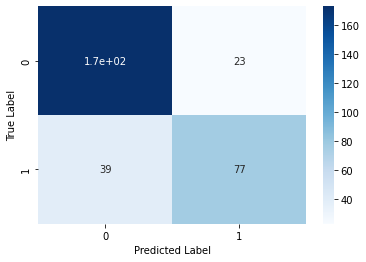



Output when max_depth is : 9 and criterion is:  entropy
----------------------------------
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       196
           1       0.72      0.67      0.70       116

    accuracy                           0.78       312
   macro avg       0.77      0.76      0.76       312
weighted avg       0.78      0.78      0.78       312

Accuracy score on test:  0.782
Accuracy score on train:  0.917
log_loss :  7.527758919156513
AUC Score :  0.808


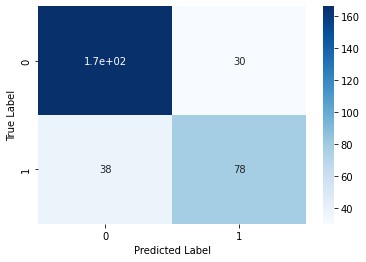

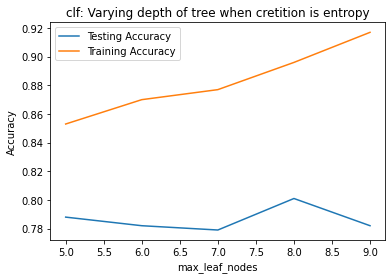

In [13]:
criterion= ['gini','entropy']
max_depth= np.arange(5, 10)
acrTest= []
acrTrain= []
for i in criterion:
  for j in max_depth:
      print("Output when max_depth is :", j, "and criterion is: ",i)
      print('----------------------------------')
    
      model = DecisionTreeClassifier(criterion = i ,max_leaf_nodes=150, random_state=0, max_depth = j).fit(X_train, Y_train)
    #predicting for our test data
      y_pred = model.predict(X_test)
    #generating classification report
      print(classification_report(Y_test, y_pred))
    #importing libraries to check model performance
      test_acrcy= round((model.score(X_test, Y_test)),3)
      train_acrcy= round((model.score(X_train, Y_train)),3)
      print("Accuracy score on test: " , test_acrcy )
      print("Accuracy score on train: ", train_acrcy)
      acrTest.append(test_acrcy)
      acrTrain.append(train_acrcy)
      
    #printing log loss for the model
      print('log_loss : ', log_loss(Y_test, y_pred))
    #let find ROC and AUC score
    #before we calculate roc_auc_score(), we need to find out the  predicted probabilities for test data.
      pred_prob = pd.DataFrame(model.predict_proba(X_test))
    #we'll also add the actual label
      test_result = pd.DataFrame( { 'actual' : Y_test})
      test_result = test_result.reset_index()
      test_result['prob_0'] = pred_prob.iloc[:,0:1]
      test_result['prob_1'] = pred_prob.iloc[:,1:2]
    #to calculate ROC AUC score we will pass actual class labels and predicted probability
      auc_score = round(metrics.roc_auc_score(test_result.actual,   test_result.prob_1),3)
      print("AUC Score : ",auc_score)
    #generating confusion matrix
      cf_matrix = confusion_matrix(Y_test, y_pred)
      sns.heatmap(cf_matrix, annot=True, cmap='Blues')
      plt.ylabel("True Label")
      plt.xlabel("Predicted Label")
      plt.show()
      print("\n")
  
  
  
  
  
  title = 'clf: Varying depth of tree when cretition is '+i
  plt.title(title)
  plt.plot(max_depth, acrTest, label = 'Testing Accuracy')
  plt.plot(max_depth,acrTrain, label = 'Training Accuracy')
  plt.legend()
  plt.xlabel('max_leaf_nodes')
  plt.ylabel('Accuracy')
  plt.show()
  acrTest=[]
  acrTrain=[]




Les différentes combinaisons parait que le model overfit sur les données d'entrainnement, a high variance.
# Randomforest

In [14]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy
clf=RandomForestClassifier(n_estimators=40)  #Creating a random forest with 100 decision trees
clf.fit(X_train, Y_train)  #Training our model
Y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.7852564102564102


In [15]:
from sklearn.model_selection import GridSearchCV
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_clf.fit(X_train, Y_train)
print(CV_clf.best_params_)

{'max_features': 'log2', 'n_estimators': 700}


In [16]:

clf=RandomForestClassifier(n_estimators=200,max_features= 'auto')  #Creating a random forest with 100 decision trees
clf.fit(X_train, Y_train)  #Training our model
Y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))  #Measuring the acc

Accuracy: 0.8044871794871795
